2022-06-07 <br/>
Pride Corporate Accountability Project <br/>
https://github.com/rfordatascience/tidytuesday/blob/master/data/2022/2022-06-07 

Highly customized circular barplot - Completed

https://www.python-graph-gallery.com/web-circular-barplot-with-matplotlib

In [123]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

In [124]:
data = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-06-07/corp_by_politician.csv")
data.head()

,Politician,SUM of Amount,Title,State
0,Greg Abbott,2219300.98,Governor,TX
1,Kay Ivey,302537.52,Governor,AL
2,Ken Paxton,192500.66,Attorney General,TX
3,Bill Lee,99250.00,Governor,TN
4,Cameron Sexton,77600.00,Speaker,TN


In [125]:
# Remove those who skew the graph
data= data[~data.Title.isin(['Governor','Representative'])]

In [126]:
summary_stats = data.groupby(["Title"]).agg(
    sum_amount = ("SUM of Amount", "sum"),
    mean_amount = ("SUM of Amount", "mean")
).reset_index()

trackNrs = data.groupby("Title").size().to_frame('n').reset_index()

In [127]:
summary_all = pd.merge(summary_stats, trackNrs, "left", on = "Title")
summary_all.mean_amount= summary_all.apply(lambda x: round(x.mean_amount,0), axis=1)
summary_all.head()

,Title,sum_amount,mean_amount,n
0,Assistant Reublican Leader,39350.00,39350.0,1
1,Attorney General,192500.66,192501.0,1
2,Caucus Chairman,40700.00,40700.0,1
3,Republican Floor Leader,3500.00,3500.0,1
4,Republican Leader,48250.00,48250.0,1


In [128]:
# Bars are sorted by the cumulative track length
df_sorted = summary_all.sort_values("sum_amount", ascending=False)

# Values for the x axis
ANGLES = np.linspace(0.05, 2 * np.pi - 0.05, len(df_sorted), endpoint=False)

# Cumulative length
LENGTHS = df_sorted["sum_amount"].values

# Mean gain length
MEAN_AMOUNT = df_sorted["mean_amount"].values

# Region label
TITLE = df_sorted["Title"].values

# Number of tracks per region
TRACKS_N = df_sorted["n"].values

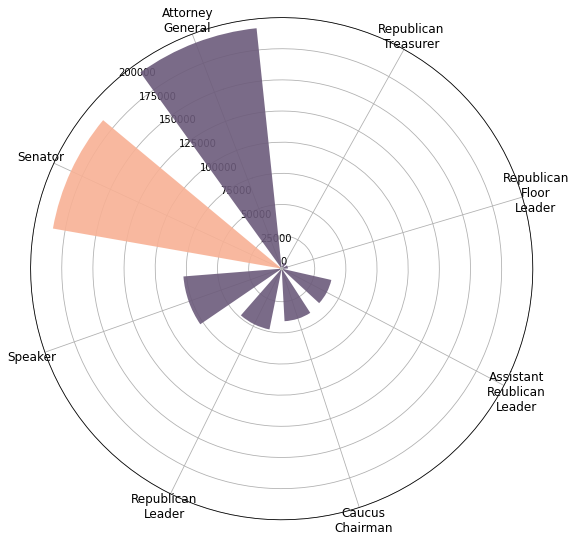

In [129]:
GREY12 = "#1f1f1f"

# Set default font to Bell MT
plt.rcParams.update({"font.family": "Bell MT"})

# Set default font color to GREY12
plt.rcParams["text.color"] = GREY12

# The minus glyph is not available in Bell MT
# This disables it, and uses a hyphen
plt.rc("axes", unicode_minus=False)

# Colors
COLORS = ["#6C5B7B","#C06C84","#F67280","#F8B195"]

# Colormap
cmap = mpl.colors.LinearSegmentedColormap.from_list("my color", COLORS, N=256)

# Normalizer
norm = mpl.colors.Normalize(vmin=TRACKS_N.min(), vmax=TRACKS_N.max())

# Normalized colors. Each number of tracks is mapped to a color in the 
# color scale 'cmap'
COLORS = cmap(norm(TRACKS_N))
#Excited about how to make it? Let's do it!

# Some layout stuff ----------------------------------------------
# Initialize layout in polar coordinates
fig, ax = plt.subplots(figsize=(9, 12.6), subplot_kw={"projection": "polar"})

# Set background color to white, both axis and figure.
fig.patch.set_facecolor("white")
ax.set_facecolor("white")

ax.set_theta_offset(1.2 * np.pi / 2)
ax.set_ylim(-1500, 200000)

# Add geometries to the plot -------------------------------------
# See the zorder to manipulate which geometries are on top

# Add bars to represent the cumulative track lengths
ax.bar(ANGLES, LENGTHS, color=COLORS, alpha=0.9, width=0.52, zorder=10)

# Add dashed vertical lines. These are just references
#ax.vlines(ANGLES, 0, 3000, color=GREY12, ls=(0, (4, 4)), zorder=11)

# Add dots to represent the mean gain
#ax.scatter(ANGLES, MEAN_AMOUNT, s=60, color=GREY12, zorder=11)


# Add labels for the regions -------------------------------------
# Note the 'wrap()' function.
# The '5' means we want at most 5 consecutive letters in a word, 
# but the 'break_long_words' means we don't want to break words 
# longer than 5 characters.
REGION = ["\n".join(wrap(r, 5, break_long_words=False)) for r in TITLE]
REGION

# Set the labels
ax.set_xticks(ANGLES)
ax.set_xticklabels(REGION, size=12);

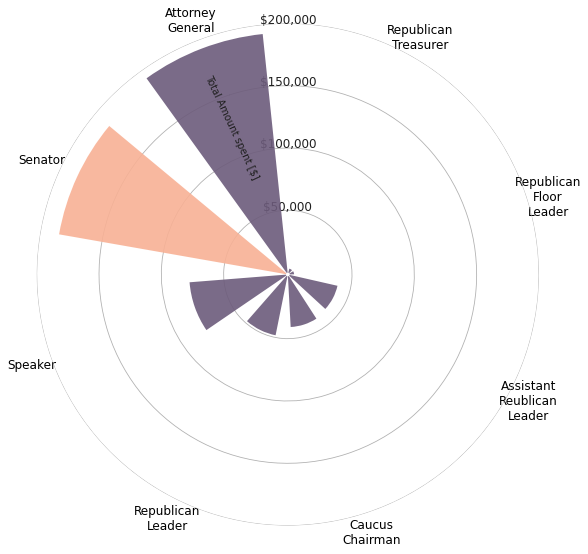

In [130]:
# Remove unnecesary guides ---------------------------------------

# Remove lines for polar axis (x)
ax.xaxis.grid(False)

# Put grid lines for radial axis (y) at 0, 1000, 2000, and 3000
ax.set_yticklabels([])
ax.set_yticks([50000,100000, 150000, 200000])

# Remove spines
ax.spines["start"].set_color("none")
ax.spines["polar"].set_color("none")


# Adjust padding of the x axis labels ----------------------------
# This is going to add extra space around the labels for the 
# ticks of the x axis.
XTICKS = ax.xaxis.get_major_ticks()
for tick in XTICKS:
    tick.set_pad(10)


# Add custom annotations -----------------------------------------
# The following represent the heights in the values of the y axis
PAD = 10
ax.text(-0.2 * np.pi / 2, 50000 + PAD, "$50,000", ha="center", size=12)
ax.text(-0.2 * np.pi / 2, 100000 + PAD, "$100,000", ha="center", size=12)
ax.text(-0.2 * np.pi / 2, 150000 + PAD, "$150,000", ha="center", size=12)
ax.text(-0.2 * np.pi / 2, 200000 + PAD, "$200,000", ha="center", size=12)


# Add text to explain the meaning of the height of the bar and the
# height of the dot
ax.text(ANGLES[0], 125000, "Total Amount spent [$]", rotation=-65, 
        ha="center", va="center", size=10, zorder=12)
# ax.text(ANGLES[0]+ 0.012, 1300, "Mean Elevation Gain\n[FASL]", rotation=-69, 
#         ha="center", va="center", size=10, zorder=12)
fig

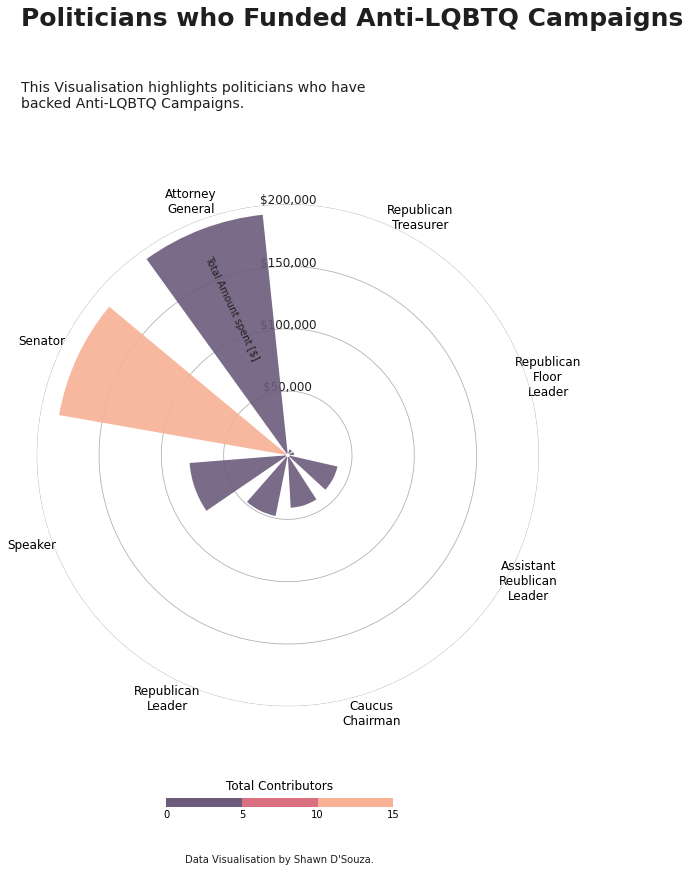

In [131]:
# Add legend -----------------------------------------------------

# First, make some room for the legend and the caption in the bottom.
fig.subplots_adjust(bottom=0.175)

# Create an inset axes.
# Width and height are given by the (0.35 and 0.01) in the 
# bbox_to_anchor
cbaxes = inset_axes(
    ax, 
    width="100%", 
    height="100%", 
    loc="center",
    bbox_to_anchor=(0.325, 0.1, 0.35, 0.01),
    bbox_transform=fig.transFigure # Note it uses the figure.
) 

# Create a new norm, which is discrete
bounds = [0, 5, 10, 15]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

# Create the colorbar
cb = fig.colorbar(
    ScalarMappable(norm=norm, cmap=cmap), 
    cax=cbaxes, # Use the inset_axes created above
    orientation = "horizontal",
    ticks=[0, 5, 10, 15]
)

# Remove the outline of the colorbar
cb.outline.set_visible(False)

# Remove tick marks
cb.ax.xaxis.set_tick_params(size=0)

# Set legend label and move it to the top (instead of default bottom)
cb.set_label("Total Contributors", size=12, labelpad=-40)

# Add annotations ------------------------------------------------

# Make some room for the title and subtitle above.
fig.subplots_adjust(top=0.8)

# Define title, subtitle, and caption
title = "Politicians who Funded Anti-LQBTQ Campaigns \n"
subtitle = "\n".join([
    "This Visualisation highlights politicians who have",
    "backed Anti-LQBTQ Campaigns.\n"
])
caption = "Data Visualisation by Shawn D'Souza.\n "

# And finally, add them to the plot.
fig.text(0.1, 0.93, title, fontsize=25, weight="bold", ha="left", va="baseline")
fig.text(0.1, 0.9, subtitle, fontsize=14, ha="left", va="top")
fig.text(0.5, 0.025, caption, fontsize=10, ha="center", va="baseline")

fig